In [ ]:
# Import packages
# Default packages
import time
import csv
import os
import json


# Preinstalled packages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# URL of our News API
base_url = 'https://api.newscatcherapi.com/v2/search'

# API key
X_API_KEY = os.getenv('API_KEY_newscatcher')

In [ ]:
headers = {'x-api-key': X_API_KEY}

# Define your desired parameters
params = {
    'q': 'Bitcoin AND Ethereum AND Dogecoin',
    'lang': 'en',
    'to_rank': 10000,
    'page_size': 100,
    'page': 1
    }

# Make a simple call with both headers and params
response = requests.get(base_url, headers=headers, params=params)

# Encode received results
results = json.loads(response.text.encode())
if response.status_code == 200:
    print('Done')
else:
    print(results)
    print('ERROR: API call failed.')

Done


In [ ]:
print(results)

{'status': 'ok', 'total_hits': 196, 'page': 1, 'total_pages': 2, 'page_size': 100, 'articles': [{'title': 'Better Buy: Dogecoin Under $0.55 or Shiba Inu Under $0.00004?', 'author': 'Bram Berkowitz', 'published_date': '2024-12-11 12:15:00', 'published_date_precision': 'full', 'link': 'https://www.aol.com/better-buy-dogecoin-under-0-121500578.html', 'clean_url': 'aol.com', 'excerpt': 'Many other cryptocurrencies, like Dogecoin (CRYPTO: DOGE) and Shiba Inu (CRYPTO: SHIB), have benefited as well, with Dogecoin up about 150% since Election Day and Shiba Inu up roughly 50%. With the…', 'summary': "It's been more than a month since the presidential election, and crypto prices are still surging. President-elect Donald Trump has nominated several extremely crypto-friendly candidates to his cabinet, and Bitcoin (CRYPTO: BTC), the world's largest cryptocurrency, has surpassed $100,000 several times. Many other cryptocurrencies, like Dogecoin (CRYPTO: DOGE) and Shiba Inu (CRYPTO: SHIB), have benef

In [ ]:
# Import data into pandasb
df = pd.DataFrame(results['articles'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     100 non-null    object 
 1   author                    100 non-null    object 
 2   published_date            100 non-null    object 
 3   published_date_precision  100 non-null    object 
 4   link                      100 non-null    object 
 5   clean_url                 100 non-null    object 
 6   excerpt                   95 non-null     object 
 7   summary                   100 non-null    object 
 8   rights                    98 non-null     object 
 9   rank                      100 non-null    int64  
 10  topic                     100 non-null    object 
 11  country                   100 non-null    object 
 12  language                  100 non-null    object 
 13  authors                   100 non-null    object 
 14  media      

In [10]:
# Variable to store all found news articles
all_news_articles = []

# Ensure that we start from page 1
params['page'] = 1

# Infinite loop which ends when all articles are extracted
while True:

    # Wait for 1 second between each call
    time.sleep(1)

    # GET Call from previous section enriched with some logs
    response = requests.get(base_url, headers=headers, params=params)
    results = json.loads(response.text.encode())
    if response.status_code == 200:
        print(f'Done for page number => {params["page"]}')


        # Adding your parameters to each result to be able to explore afterwards
        for i in results['articles']:
            i['used_params'] = str(params)


        # Storing all found articles
        all_news_articles.extend(results['articles'])

        # Ensuring to cover all pages by incrementing "page" value at each iteration
        params['page'] += 1
        if params['page'] > results['total_pages']:
            print("All articles have been extracted")
            break
        else:
            print(f'Proceed extracting page number => {params["page"]}')
    else:
        print(results)
        print(f'ERROR: API call failed for page number => {params["page"]}')
        break

print(f'Number of extracted articles => {str(len(all_news_articles))}')

Done for page number => 1
Proceed extracting page number => 2
Done for page number => 2
All articles have been extracted
Number of extracted articles => 196


In [11]:
# Generate CSV from Pandas table
# Create Pandas table
pandas_table = pd.DataFrame(all_news_articles)

# Generate CSV
pandas_table.to_csv('extracted_news_articles.csv', encoding='utf-8', sep=';')

In [ ]:
df = pandas_table

In [16]:
df.head(10)

,title,author,published_date,published_date_precision,link,clean_url,excerpt,summary,rights,rank,topic,country,language,authors,media,is_opinion,twitter_account,_score,_id,used_params
0,Better Buy: Dogecoin Under $0.55 or Shiba Inu ...,Bram Berkowitz,2024-12-11 12:15:00,full,https://www.aol.com/better-buy-dogecoin-under-...,aol.com,"Many other cryptocurrencies, like Dogecoin (CR...",It's been more than a month since the presiden...,aol.com,193,business,US,en,"The Motley Fool,AOL Staff,Bram Berkowitz",https://s.yimg.com/cv/apiv2/aolfp/metadata/og-...,False,@AOL,34.544094,0cc3e788a1aa426b705fe4242e19f837,"{'q': 'Bitcoin AND Ethereum AND Dogecoin', 'la..."
1,"Why Bitcoin, Ethereum, and Dogecoin Popped Today",Travis Hoium,2024-12-11 20:32:18,full,https://finance.yahoo.com/news/why-bitcoin-eth...,yahoo.com,Bitcoin (CRYPTO: BTC) is once again trading ab...,Cryptocurrencies had another great day on Wedn...,yahoo.com,41,news,US,en,"Travis Hoium,The Motley Fool",https://media.zenfs.com/en/motleyfool.com/8008...,False,@YahooFinance,34.080906,fff6567978fd24ffebd08edff03f5528,"{'q': 'Bitcoin AND Ethereum AND Dogecoin', 'la..."
2,Better Buy: Dogecoin Under $0.55 or Shiba Inu ...,Bram Berkowitz,2024-12-11 12:15:00,full,https://finance.yahoo.com/news/better-buy-doge...,yahoo.com,"Many other cryptocurrencies, like Dogecoin (CR...",It's been more than a month since the presiden...,yahoo.com,41,news,US,en,"Bram Berkowitz,The Motley Fool",https://s.yimg.com/ny/api/res/1.2/IkwiWb4c8td9...,False,@YahooFinance,33.833057,549551fbf80f5ed06a546a2f99cdf4d1,"{'q': 'Bitcoin AND Ethereum AND Dogecoin', 'la..."
3,"Why Bitcoin, Ethereum, and Dogecoin just poppe...",Travis Hoium,2024-12-11 23:15:00,full,https://www.msn.com/en-au/lifestyle/misc/why-b...,msn.com,None,This article was originally published on Fool....,msn.com,121,news,US,en,Travis Hoium,None,False,None,33.746834,72598b027082627a99151d69b772004d,"{'q': 'Bitcoin AND Ethereum AND Dogecoin', 'la..."
4,Altcoins surge as Dogecoin and Solana rally am...,Sabrina Toppa,2024-12-11 16:31:49,full,https://finance.yahoo.com/news/altcoins-surge-...,yahoo.com,"Cardano, XRP, Dogecoin, and Solana have all se...",Altcoins – or alternative cryptocurrencies tha...,yahoo.com,41,news,US,en,Sabrina Toppa,https://media.zenfs.com/en/thestreet_881/9d456...,False,@YahooFinance,33.256700,ab342949d156744d6a44002cd97edb8d,"{'q': 'Bitcoin AND Ethereum AND Dogecoin', 'la..."
5,Dogecoin Surges 9% to $0.46 as Bitcoin Breaks ...,Decentralized Dog,2024-12-06 08:19:13,full,https://finance.yahoo.com/news/dogecoin-surges...,yahoo.com,Dogecoin surged 9% to a weekly high of nearly ...,Dogecoin surged 9% to a weekly high of nearly ...,yahoo.com,41,news,US,en,Decentralized Dog,https://media.zenfs.com/en/coinmarketcap_783/5...,False,@YahooFinance,33.186832,088bbfb85dc8aad8fcf2915b69043893,"{'q': 'Bitcoin AND Ethereum AND Dogecoin', 'la..."
6,Altcoins surge as Dogecoin and Solana rally am...,Sabrina Toppa,2024-12-11 16:31:49,full,https://www.thestreet.com/crypto/markets/altco...,thestreet.com,"Cardano, XRP, Dogecoin, and Solana have all se...",Altcoins – or alternative cryptocurrencies tha...,None,1513,news,US,en,Sabrina Toppa,https://www.thestreet.com/.image/t_share/MjA4M...,False,None,33.183630,8e392ff691031841ce9f63d50317c2e3,"{'q': 'Bitcoin AND Ethereum AND Dogecoin', 'la..."
7,Mark Cuban Once Called These Lesser-Known Cryp...,Aniket Verma,2024-12-11 12:30:20,full,https://www.benzinga.com/markets/cryptocurrenc...,benzinga.com,Billionaire entrepreneur and popular televisio...,Billionaire entrepreneur and popular televisio...,benzinga.com,2001,news,US,en,Aniket Verma,https://cdn.benzinga.com/files/images/story/20...,False,@benzinga,33.032772,0f944b67b3f7dec0bca0330059aedd88,"{'q': 'Bitcoin AND Ethereum AND Dogecoin', 'la..."
8,"Why Bitcoin, Ethereum, and Dogecoin Popped Today",Travis Hoium,2024-12-11 20:32:18,full,https://www.aol.com/why-bitcoin-ethereum-dogec...,aol.com,Bitcoin (CRYPTO: BTC) is once again trading ab...,Cryptocurrencies h

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     196 non-null    object 
 1   author                    196 non-null    object 
 2   published_date            196 non-null    object 
 3   published_date_precision  196 non-null    object 
 4   link                      196 non-null    object 
 5   clean_url                 196 non-null    object 
 6   excerpt                   190 non-null    object 
 7   summary                   196 non-null    object 
 8   rights                    189 non-null    object 
 9   rank                      196 non-null    int64  
 10  topic                     196 non-null    object 
 11  country                   196 non-null    object 
 12  language                  196 non-null    object 
 13  authors                   196 non-null    object 
 14  media     

In [ ]:
df.iloc[1,[4,6,7]].to_csv('art1.csv')

In [26]:
df.iloc[:,[4,6,7]].to_csv('100artikel_newscatcher.csv')


len(df.iloc[-4,7])

In [36]:
df['length']=df.iloc[:,7].apply(len)

<Axes: xlabel='length', ylabel='title'>

c:\Users\onepl\Desktop\Finanzen Behörden etc - Copy\Bewerbung\Fortbildungen\DS Bootcamp\Project_News_NLP\news_nlp_venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\onepl\Desktop\Finanzen Behörden etc - Copy\Bewerbung\Fortbildungen\DS Bootcamp\Project_News_NLP\news_nlp_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


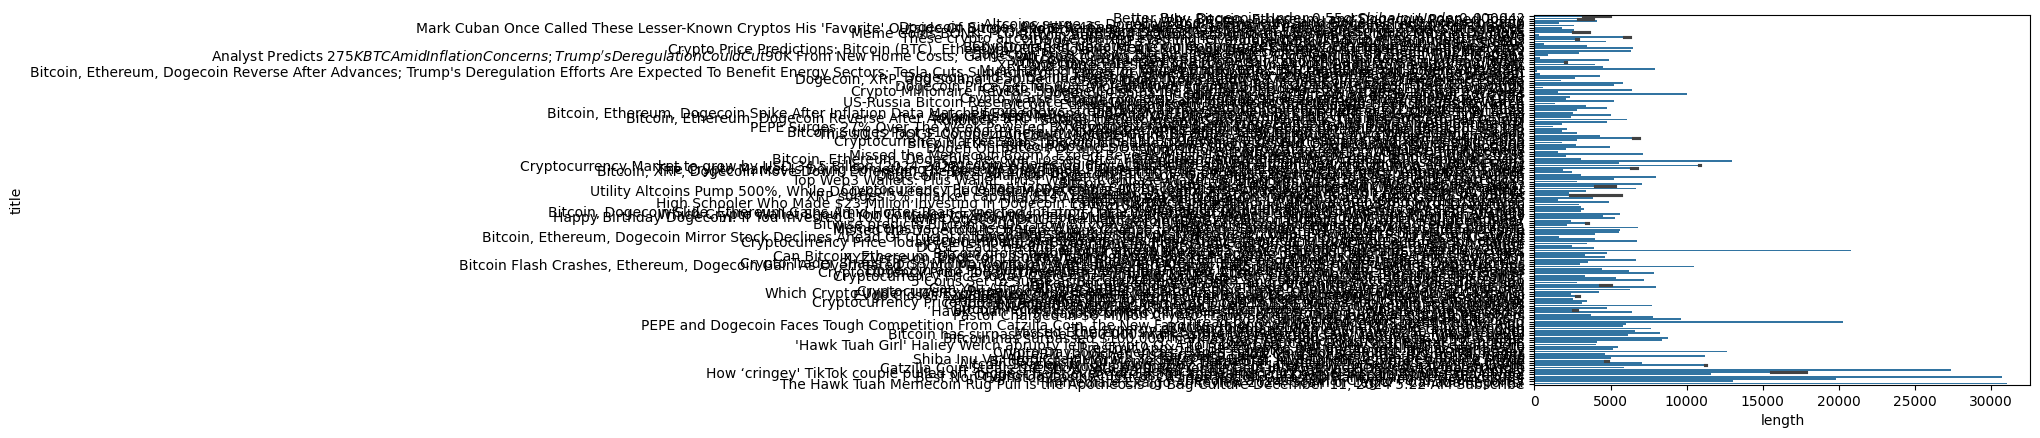

In [39]:
sns.barplot(data=df, x='length', y="title")

C:\Users\onepl\AppData\Local\Temp\ipykernel_5664\3064226332.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)


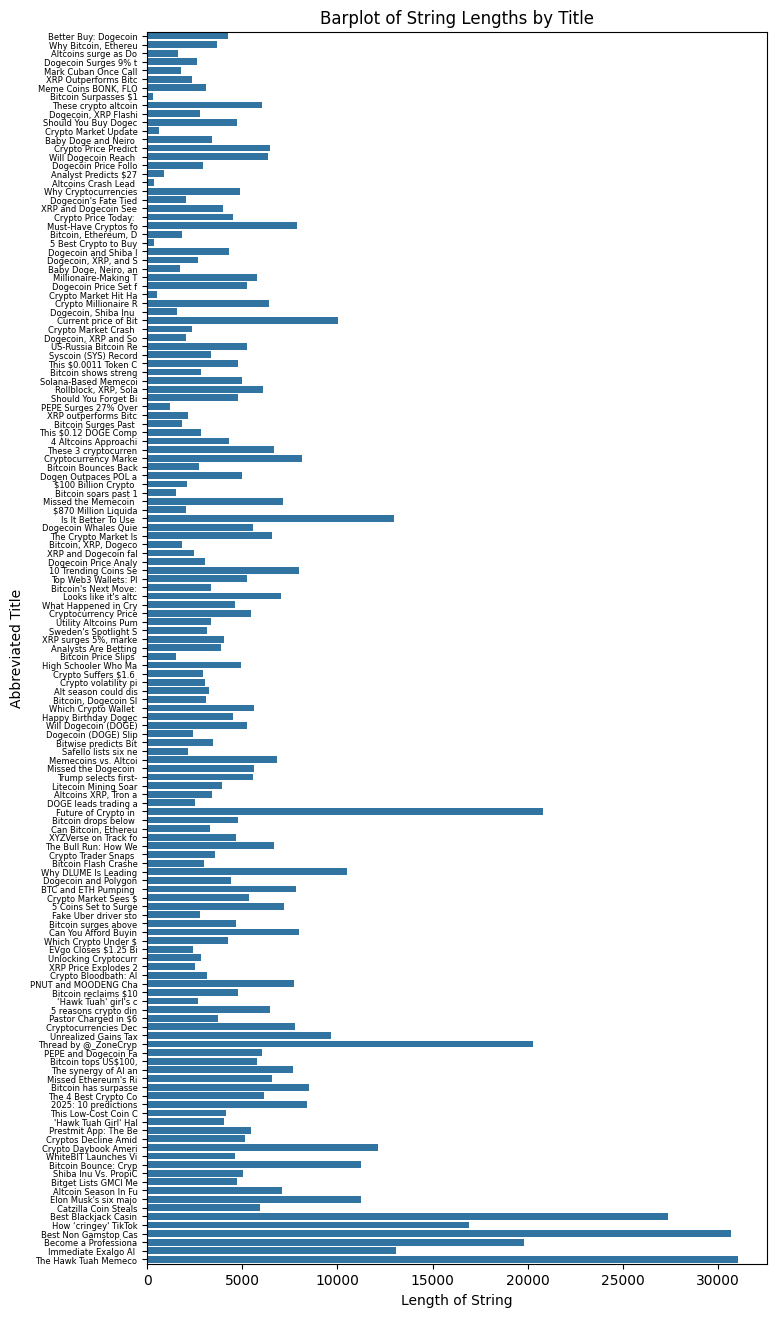

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Abbreviate titles to the first 20 characters
df['abbreviated_title'] = df['title'].apply(lambda x: x[:20] if isinstance(x, str) else '')

# Set figure size (16 units tall)
plt.figure(figsize=(8, 16))

# Create the barplot
ax = sns.barplot(data=df, x='length', y='abbreviated_title', errorbar = None)

# Reduce font size of y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)

# Customize the plot
plt.xlabel('Length of String')
plt.ylabel('Abbreviated Title')
plt.title('Barplot of String Lengths by Title')
plt.show()
